In [142]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [143]:
new_shape = (136, 102, 3)

In [144]:
model = VGG16(weights='imagenet', input_shape=new_shape, include_top=False)

In [13]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 136, 102, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 136, 102, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 136, 102, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 68, 51, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 68, 51, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 68, 51, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 34, 25, 128)       0     

In [138]:
def extract_features(img_path, model):
    input_shape = (136, 102, 3)
    img = image.load_img(img_path,
                         target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [15]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                filepath = os.path.join(root, filename)
                if os.path.exists(filepath):
                  file_list.append(filepath)
                else:
                  print(filepath)
    return file_list

In [32]:
root_dir = "/home/christoph/Desktop/zappos-ds"
filenames = sorted(get_file_list(root_dir))
print(len(filenames))

12856


In [33]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/home/christoph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [34]:
pickle.dump(filenames, open('/home/christoph/Desktop/filenames-caltech101.pickle', 'wb'))
pickle.dump(feature_list, open('/home/christoph/Desktop/features-caltech101-resnet.pickle', 'wb'))

## Visualization

In [10]:
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import random
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [11]:
filenames = pickle.load(open('/home/christoph/Desktop/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('/home/christoph/Desktop/features-caltech101-resnet.pickle',
                                'rb'))

In [12]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  12856
Number of features per image =  6144


In [13]:
len(feature_list)

12856

In [14]:
num_feature_dimensions = 100
pca = PCA(n_components=num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

In [15]:
pickle.dump(feature_list_compressed, open('/home/christoph/Desktop/flCompressed.pickle', 'wb'))

In [16]:
[(1,2), (4,5)]

[(1, 2), (4, 5)]

In [25]:
def slicing(slices):
    sel_feat = np.empty([0,100])
    sel_file = []
    for idx, (start, end) in enumerate(slices):
        sel_feat = np.append(sel_feat, feature_list_compressed[start:end], axis=0)
        sel_file = sel_file + filenames[start:end]
        
    return sel_feat, sel_file

In [129]:
slices = [(500,510), 
          (1000,1010), 
          (1500, 1510), 
          (2000, 2010), 
          (2500, 2510), 
          (3000, 3010), 
          (3500, 3510), 
          (4000, 4010),
          (4500, 4510),
          (5000, 5010)]
# selected_features, selected_filenames = slicing(slices)

time_start = time.time()
tsne_results = TSNE(n_components=2, verbose=1,
                    metric='euclidean').fit_transform(new_feats)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 5 samples in 0.000s...
[t-SNE] Computed neighbors for 5 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 5 / 5
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.346184
[t-SNE] Error after 1000 iterations: 0.110419
t-SNE done! Time elapsed: 0.11268091201782227 seconds


In [121]:
for i, fn in enumerate(selected_filenames):
    if fn in crazy:
        print(i)

4
5
81
95
96


In [123]:
inds = [4,5,81,95,96]

In [128]:
new_feats = [selected_features[i] for i in inds]

In [130]:
new_fns = crazy

In [34]:
def tsne_to_grid_plotter_manual(x, y, selected_filenames):
    print(x.shape)
    print(y.shape)
    S = 2000
    s = 100
    x = (x - min(x)) / (max(x) - min(x))
    y = (y - min(y)) / (max(y) - min(y))
    x_values = []
    y_values = []
    filename_plot = []
    x_y_dict = {}
    print(len(selected_filenames))
    for i, image_path in enumerate(selected_filenames):
        a = np.ceil(x[i] * (S - s))
        b = np.ceil(y[i] * (S - s))
        a = int(a - np.mod(a, s))
        b = int(b - np.mod(b, s))
        if str(a) + "|" + str(b) in x_y_dict:
            continue
        x_y_dict[str(a) + "|" + str(b)] = 1
        x_values.append(a)
        y_values.append(b)
        filename_plot.append(image_path)
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x_values, y_values, filename_plot, zoom=.58, axis=axis)
    plt.show()
    return (x_values, y_values, filename_plot)

In [36]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data


def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    if axis is None:
        axis = plt.gca()
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        image.thumbnail((100, 100), Image.ANTIALIAS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0),
                                  xycoords='data',
                                  frameon=False)
        axis.add_artist(anno_box)
    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()

In [ ]:
3 4

(5,)
(5,)
5


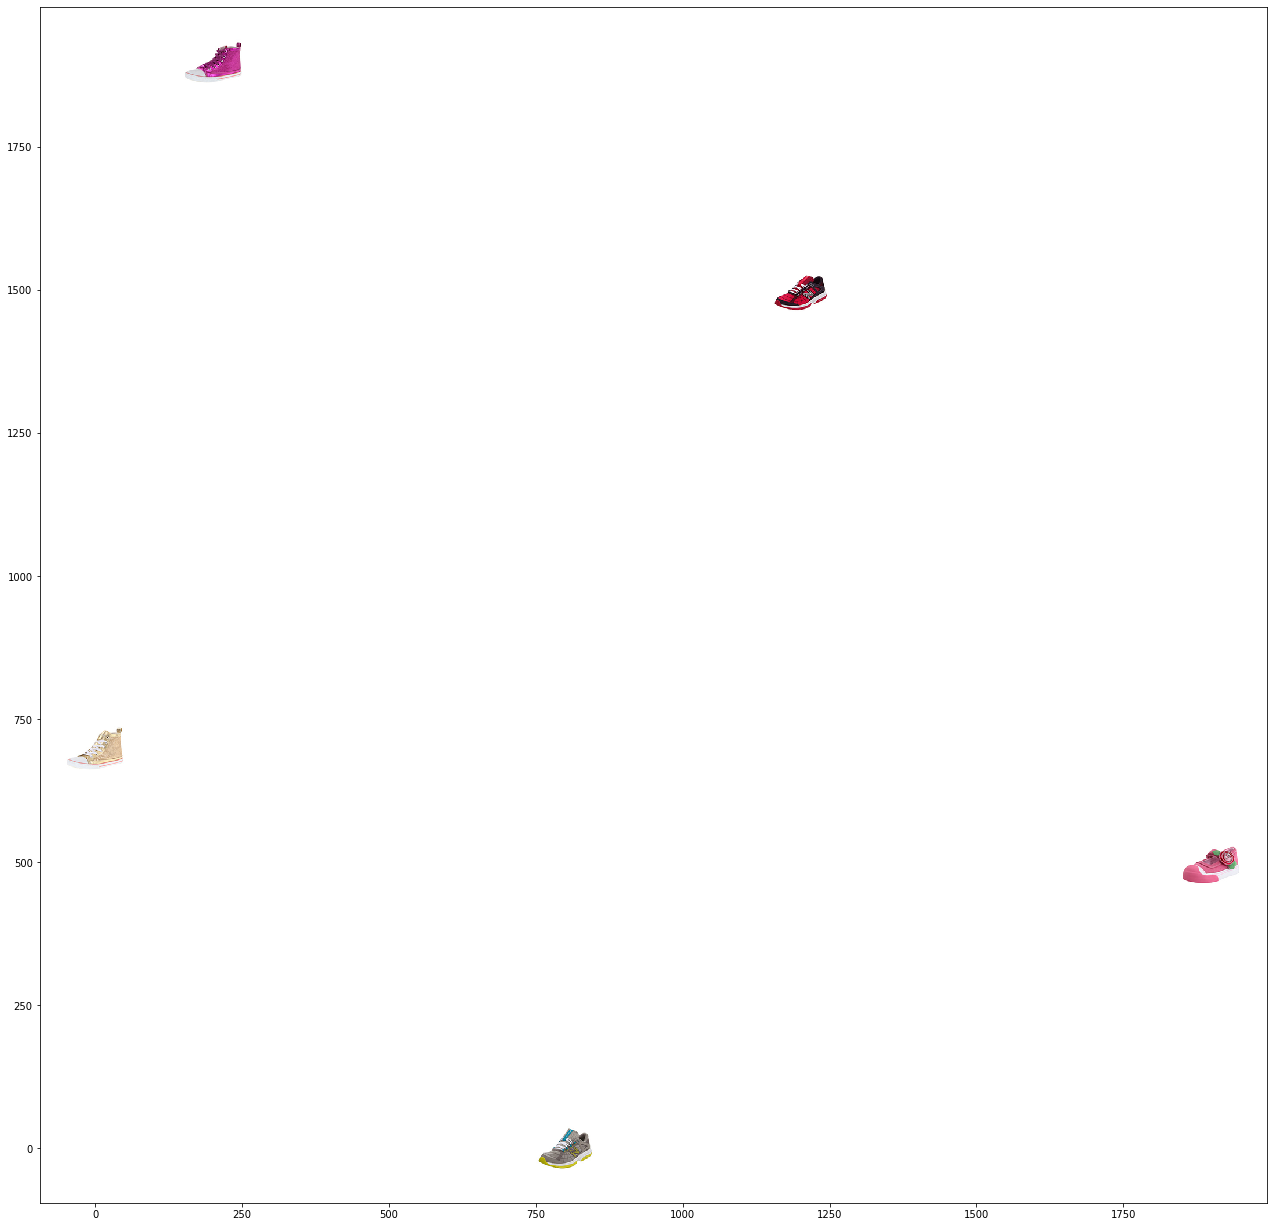

In [132]:
x, y, path = tsne_to_grid_plotter_manual(tsne_results[:, 0], tsne_results[:, 1],
                            crazy)

In [133]:
x

[0, 1900, 800, 1200, 200]

In [134]:
y

[700, 500, 0, 1500, 1900]

In [135]:
dset = {}
for idx, name in enumerate(crazy):
    normed_x = int(((x[idx]*0.85)/1900)*100 + 10)
    normed_y = int(((y[idx]*0.85)/1900)*100 + 10)
    dset[name] = (normed_x, normed_y)
dset

{'/home/christoph/Desktop/zappos-ds/Amiana/8028479.372602.jpg': (10, 41),
 '/home/christoph/Desktop/zappos-ds/Morgan&Milo Kids/7849221.36297.jpg': (95,
  32),
 '/home/christoph/Desktop/zappos-ds/New Balance/7837853.425096.jpg': (45, 10),
 '/home/christoph/Desktop/zappos-ds/New Balance/7837853.223736.jpg': (63, 77),
 '/home/christoph/Desktop/zappos-ds/Amiana/8028479.372601.jpg': (18, 95)}

In [38]:
len(x)

87

In [39]:
slist = get_file_list(shoes)

NameError: name 'get_file_list' is not defined

In [71]:
slist[99]

'/home/christoph/Desktop/zappos-ds/Shoes/Firstwalker/Lacoste Kids/7985137.7778.jpg'

In [42]:
len(path), len(x), len(y)

(87, 87, 87)

In [43]:
dset = {}
for idx, name in enumerate(path):
    normed_x = int(((x[idx]*0.85)/1900)*100 + 10)
    normed_y = int(((y[idx]*0.85)/1900)*100 + 10)
    dset[name] = (normed_x, normed_y)

In [44]:
len(dset)

87

In [45]:
import json
with open('/home/christoph/Desktop/shoes.json', 'w') as f:
    json.dump(dset, f)

In [ ]:
dset

In [117]:
dset

{'/home/christoph/Desktop/zappos-ds/Amiana/8028444.162714.jpg': (68, 86),
 '/home/christoph/Desktop/zappos-ds/Amiana/8028463.27549.jpg': (59, 63),
 '/home/christoph/Desktop/zappos-ds/Amiana/8028463.65215.jpg': (86, 50),
 '/home/christoph/Desktop/zappos-ds/Amiana/8028479.372601.jpg': (68, 95),
 '/home/christoph/Desktop/zappos-ds/Amiana/8028479.372602.jpg': (63, 90),
 '/home/christoph/Desktop/zappos-ds/Anne Klein/7870005.80.jpg': (68, 45),
 '/home/christoph/Desktop/zappos-ds/Arcopedico/8029325.3.jpg': (72, 45),
 '/home/christoph/Desktop/zappos-ds/Arcopedico/8029325.585.jpg': (77, 54),
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.14.jpg': (54, 59),
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.21891.jpg': (50, 59),
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.3.jpg': (41, 59),
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7140341.72.jpg': (45, 54),
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7567987.3.jpg': (45, 59),
 '/home/christoph/Desktop/zap

In [46]:
keys = list(dset.keys())

In [108]:
keys

['/home/christoph/Desktop/zappos-ds/Amiana/8028444.162714.jpg',
 '/home/christoph/Desktop/zappos-ds/Amiana/8028463.27549.jpg',
 '/home/christoph/Desktop/zappos-ds/Amiana/8028463.65215.jpg',
 '/home/christoph/Desktop/zappos-ds/Amiana/8028479.372601.jpg',
 '/home/christoph/Desktop/zappos-ds/Amiana/8028479.372602.jpg',
 '/home/christoph/Desktop/zappos-ds/Anne Klein/7870005.80.jpg',
 '/home/christoph/Desktop/zappos-ds/Arcopedico/8029325.3.jpg',
 '/home/christoph/Desktop/zappos-ds/Arcopedico/8029325.585.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.14.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.21891.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.3.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7140341.72.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7567987.3.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7568334.263.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7568335.263.jpg',
 '/home/christoph/Desktop

In [113]:
crazy = ["/home/christoph/Desktop/zappos-ds/Amiana/8028479.372602.jpg",
"/home/christoph/Desktop/zappos-ds/Morgan&Milo Kids/7849221.36297.jpg",
"/home/christoph/Desktop/zappos-ds/New Balance/7837853.425096.jpg",
"/home/christoph/Desktop/zappos-ds/New Balance/7837853.223736.jpg",
"/home/christoph/Desktop/zappos-ds/Amiana/8028479.372601.jpg"]

In [ ]:
/home/christoph/Desktop/zappos-ds/Amiana/8028479.372602.jpg
/home/christoph/Desktop/zappos-ds/Morgan&Milo Kids/7849221.36297.jpg
/home/christoph/Desktop/zappos-ds/New Balance/7837853.425096.jpg
/home/christoph/Desktop/zappos-ds/New Balance/7837853.223736.jpg
/home/christoph/Desktop/zappos-ds/Amiana/8028479.372601.jpg

In [112]:
import shutil
for i, k in enumerate(keys):
    print(str(i) + " --- " + k)
    # shutil.copy2(k, '/home/christoph/Desktop/imgdb2/{}.jpg'.format(k))

0 --- /home/christoph/Desktop/zappos-ds/Amiana/8028444.162714.jpg
1 --- /home/christoph/Desktop/zappos-ds/Amiana/8028463.27549.jpg
2 --- /home/christoph/Desktop/zappos-ds/Amiana/8028463.65215.jpg
3 --- /home/christoph/Desktop/zappos-ds/Amiana/8028479.372601.jpg
4 --- /home/christoph/Desktop/zappos-ds/Amiana/8028479.372602.jpg
5 --- /home/christoph/Desktop/zappos-ds/Anne Klein/7870005.80.jpg
6 --- /home/christoph/Desktop/zappos-ds/Arcopedico/8029325.3.jpg
7 --- /home/christoph/Desktop/zappos-ds/Arcopedico/8029325.585.jpg
8 --- /home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.14.jpg
9 --- /home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.21891.jpg
10 --- /home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.3.jpg
11 --- /home/christoph/Desktop/zappos-ds/Capezio Kids/7140341.72.jpg
12 --- /home/christoph/Desktop/zappos-ds/Capezio Kids/7567987.3.jpg
13 --- /home/christoph/Desktop/zappos-ds/Capezio Kids/7568334.263.jpg
14 --- /home/christoph/Desktop/zappos-ds/Capezio Kids/756833

In [72]:
brands = ["Adidos", "Naike", "Timmy", "Vens", "Bagutti", "Croocs", "Elment", "Gabur", "Locaste", "N90"]
names = ["Knights", "Square", "Trainers", "Skool", "Tanjun", "Cogna", "Court", "Winston", "Oxford", "T70"]

In [73]:
len(names)

10

In [81]:
fl = random.uniform(10., 150.)
round(fl, 0) + .99

52.99

In [82]:
{
    _id: "0",
    name: "Nik Ir",
    price: 89.99,
    rating: 4.5,
    image: "/images/0.jpg",
},

NameError: name '_id' is not defined

In [49]:
f = open("/home/christoph/Desktop/write.txt", "w")
for i, e in enumerate(keys):
    f.write("import img{} from \"../assets/other_imgs/imgdb/{}.jpg\";\n".format(i,i))

base = "["
for i in range(len(keys)):
    base = base + "img{}".format(i) + ","
base = base + "]"
f.write(base)    
f.close()

In [2]:
f = open("/home/christoph/Desktop/imgDB.txt", "r")
# print(f.read())

In [53]:
with open('/home/christoph/Desktop/shoes.json', "r") as f:
    kset = json.loads(f.read())
len(kset)

87

In [61]:
vals = list(kset.values())

In [64]:
kset_m = {}
for i in range(len(kset)):
    kset_m[i] = vals[i]

In [66]:
with open('/home/christoph/Desktop/scoords.json', 'w') as f:
    json.dump(kset_m, f)

In [69]:
import random

[68, 86]

In [87]:
rat = random.uniform(2., 5.)
round(rat, 1) 

2.6

In [ ]:
# .format(str_index, final_name, price, rat, index)

In [107]:
f = open("/home/christoph/Desktop/prods.txt", "w")
for i in range(87):
    index = i
    str_index = str(index)
    seed1 = random.randint(0,9)
    seed2 = random.randint(0,9)
    brand_tmp = brands[seed1]
    name_tmp = names[seed2]
    final_name = brand_tmp + " " + name_tmp
    price = random.uniform(10., 150.)
    price = round(price, 0) + .99
    rat = random.uniform(2., 5.)
    rat = round(rat, 1) 
    
    out = "{{\n_id: \"{0}\",\nname: \"{1}\",\nprice: {2},\nrating: {3},\nimage: \"/images/{4}.jpg\",\n}},".format(str_index, final_name, price, rat ,index)
    
    f.write(out)
 
f.close()
    

In [145]:
keys

['/home/christoph/Desktop/zappos-ds/Amiana/8028444.162714.jpg',
 '/home/christoph/Desktop/zappos-ds/Amiana/8028463.27549.jpg',
 '/home/christoph/Desktop/zappos-ds/Amiana/8028463.65215.jpg',
 '/home/christoph/Desktop/zappos-ds/Amiana/8028479.372601.jpg',
 '/home/christoph/Desktop/zappos-ds/Amiana/8028479.372602.jpg',
 '/home/christoph/Desktop/zappos-ds/Anne Klein/7870005.80.jpg',
 '/home/christoph/Desktop/zappos-ds/Arcopedico/8029325.3.jpg',
 '/home/christoph/Desktop/zappos-ds/Arcopedico/8029325.585.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.14.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.21891.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7138760.3.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7140341.72.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7567987.3.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7568334.263.jpg',
 '/home/christoph/Desktop/zappos-ds/Capezio Kids/7568335.263.jpg',
 '/home/christoph/Desktop

In [149]:
feats = {}
for i, k in enumerate(keys):
    feats[i] = extract_features(k, model)

In [157]:
with open('/home/christoph/Desktop/86feats.npy', 'wb') as f:
    np.save(f, feats)

In [160]:
with open('/home/christoph/Desktop/86feats.npy', 'rb') as f:
    f2 = np.load(f, allow_pickle=True)
f2.shape

()

In [171]:
d = dict(enumerate(f2.flatten(), 1))

In [182]:
f1 = d[1][44]

In [198]:
ff = [1,2,3,5,6,7,8,9,0]

In [201]:
min_idx = []
for i in range(5):
    orig_mins = min(dis)
    new_idx = dis.index(orig_mins)
    min_idx.append(new_idx)
    dis[new_idx] = 99999

min_idx

[44, 51, 49, 47, 45]

In [187]:
dis = []
for i in range(55):
    distance = np.linalg.norm(f1 - d[1][i])
    dis.append(distance)
    # print(str(i) + ": " + str(distance))

0: 1.1393498
1: 1.2431211
2: 1.2788113
3: 1.1736054
4: 1.2304013
5: 1.0590578
6: 1.1985087
7: 1.0973387
8: 1.2571864
9: 1.3016319
10: 1.1431768
11: 1.1282208
12: 1.2772188
13: 1.1865429
14: 1.2590383
15: 1.1762768
16: 1.2007775
17: 1.0800357
18: 1.1046511
19: 0.9883193
20: 1.1351568
21: 1.0828323
22: 1.1377741
23: 1.2197621
24: 1.2204084
25: 1.167454
26: 1.1569047
27: 1.0991366
28: 1.0817161
29: 1.0609351
30: 1.1133188
31: 1.1088319
32: 1.1113843
33: 1.1201744
34: 1.1642817
35: 1.1720054
36: 1.2482187
37: 1.0627726
38: 1.1119853
39: 1.1944551
40: 1.1546706
41: 1.1445106
42: 1.1536403
43: 1.1740773
44: 0.0
45: 0.8336205
46: 0.9798898
47: 0.82521236
48: 0.8564923
49: 0.76896244
50: 1.0395273
51: 0.7250159
52: 0.99936867
53: 1.1580211
54: 1.1174557
